# **Top 50 Spotify Tracks- 2020**

We will analyze the Top 50 Spotify Tracks of 2020 to identify and quantify the key features that make a song a hit.

##### 1) Load the data using Pandas.

In [1]:
import pandas as pd

##### 2) Download the data from Spotify Top 50 Tracks of 2020 dataset.

In [125]:
data = pd.read_csv('spotifytoptracks.csv', index_col=0)

In [ ]:
data.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


##### 3) Handling missing values

We will check if there are any rows or columns that have null values

In [127]:
pd.isnull(data).sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

Interpretation: There are no rows or columns with null values so the dataset is complete

##### 4) Removing duplicate samples and features

We will check if there are any repeated values

In [128]:
data.duplicated().sum()

np.int64(0)

In [129]:
data.duplicated().value_counts()

False    50
Name: count, dtype: int64

Interpretation: The dataset is clean and there are no duplicates

##### 5) Treatment of outliers

We will calculate the IQR only for numeric columns, we will compute the 25th and 75th percentiles, then we will compute Tukey fences for outliers per column (values outside [Q1−1.5·IQR, Q3+1.5·IQR] for that column)

In [130]:
num = data.select_dtypes(include="number")
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

(num.lt(lower) | num.gt(upper)).sum().sort_values(ascending=False)


instrumentalness    12
acousticness         7
speechiness          6
danceability         3
liveness             3
duration_ms          2
loudness             1
key                  0
energy               0
valence              0
tempo                0
dtype: int64

Interpretation: Outliers are most common in instrumentalness (12), then acousticness (7) and speechiness (6) these features have many near-zero values with a few very high ones, so IQR flags the highs. Smaller counts appear in danceability (3), liveness (3), duration_ms (2), and loudness (1): key, energy, valence, tempo (0) show no IQR outliers. These points are unusual, not “bad” data, but heavy outliers (e.g., instrumentalness) can distort correlations and mean-based comparisons.

##### 6) How many observations and features does this dataset have?

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usage: 6.

In [132]:
data.shape

(50, 16)

Observations count: We will count how many rows are in this dataset

In [133]:
data.shape[0]

50

Interpretation: This dataset contains 50 rows

Features count: We will count how many features are in this dataset

In [134]:
data.shape[1]

16

Interpretation: This dataset contains 16 columns (excluding the built-in index of the csv)

##### 7) Which of the features are categorical?

We will look for datatype object in the dataset (string-based)

In [162]:
data.select_dtypes(include="object").columns

Index(['artist', 'album', 'track_name', 'track_id', 'genre'], dtype='object')

Interpretation: This dataset contain 5 columns that are categorical, 'artist', 'album', 'track_name', 'track_id', 'genre'

##### 8) Which of the features are numeric?

In [136]:
data.select_dtypes(include="number").columns

Index(['energy', 'danceability', 'key', 'loudness', 'acousticness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Interpretation: The dataset contains 11 columns that are numeric, 'energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', and 'duration_ms'

##### 9) Are there any artists that have more than 1 popular track? If yes, which, and how many?

In [137]:
data.groupby("artist")["track_name"].nunique().loc[lambda s: s > 1].sort_values(ascending=False)

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Harry Styles     2
Justin Bieber    2
Lewis Capaldi    2
Post Malone      2
Name: track_name, dtype: int64

Interpretation: There are 7 artists with more than 1 track
- Billie Eilish with 3 tracks
- Dua Lipa with 3 tracks
- Travis Scott with 3 tracks
- Harry Styles with 2 tracks
- Justin Bieber with 2 tracks
- Lewis Capaldi with 2 tracks
- Post Malone with 2 tracks

##### 10) Who was the most popular artist?

In [163]:
s = data.groupby("artist")["track_name"].nunique()
s[s == s.max()]

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: track_name, dtype: int64

Interpretation: Billie Eilish, Dua Lipa and Travis Scott were the 3 most popular artist with a tie of 3 popular tracks each

##### 11) How many artists have their songs in the top 50 in total?

In [139]:
data["artist"].nunique()

40

Interpretation: In our dataset of the top 50 songs there are 40 distinct artists

##### 12) Are there any albums that have more than 1 popular track? If yes, which, and how many?

In [165]:
data.groupby("album")["track_name"].nunique().loc[lambda s: s > 1].sort_values(ascending=False)

album
Future Nostalgia        3
Changes                 2
Fine Line               2
Hollywood's Bleeding    2
Name: track_name, dtype: int64

Interpretation: There are 4 albums with more than 1 popular track. 
- Future Nostalgia with 3 tracks
- Changes with 2 tracks
- Fine Line with 2 tracks
- Hollywood's Bleeding with 2 tracks

##### 13) How many albums in total have their songs in the top 50?

In [141]:
data["album"].nunique()


45

Interpretation: There are 40 albums in the top 50 Spotify tracks

##### 14)  Which tracks have a danceability score above 0.7?

In [142]:
data.loc[data["danceability"] > 0.7,["track_name", "artist", "danceability"]]


,track_name,artist,danceability
1,Dance Monkey,Tones And I,0.825
2,The Box,Roddy Ricch,0.896
3,Roses - Imanbek Remix,SAINt JHN,0.785
4,Don't Start Now,Dua Lipa,0.793
5,ROCKSTAR (feat. Roddy Ricch),DaBaby,0.746
7,death bed (coffee for your head),Powfu,0.726
8,Falling,Trevor Daniel,0.784
10,Tusa,KAROL G,0.803
13,Blueberry Faygo,Lil Mosey,0.774
14,Intentions (feat. Quavo),Justin Bieber,0.806


Interpretation: The majority of tracks (49) have a danceability > 0.7

##### 15) Which tracks have a danceability score below 0.4?

In [143]:
data.loc[data["danceability"] < 0.4, ["track_name", "artist", "danceability"]]


,track_name,artist,danceability
44,lovely (with Khalid),Billie Eilish,0.351


Interpretation: Only 1 track (lovely (with Khalid)) have a danceability below 0.4

##### 16) Which tracks have their loudness above -5?

In [144]:
data.loc[data["loudness"] > -5, ["track_name", "artist", "loudness"]]


,track_name,artist,loudness
4,Don't Start Now,Dua Lipa,-4.521
6,Watermelon Sugar,Harry Styles,-4.209
10,Tusa,KAROL G,-3.280
12,Circles,Post Malone,-3.497
16,Before You Go,Lewis Capaldi,-4.858
17,Say So,Doja Cat,-4.577
21,Adore You,Harry Styles,-3.675
23,Mood (feat. iann dior),24kGoldn,-3.558
31,Break My Heart,Dua Lipa,-3.434
32,Dynamite,BTS,-4.410


Interpretation: There are 19 tracks with loudness above -5

##### 17) Which tracks have their loudness below -8?

In [145]:
data.loc[data["loudness"] < -8, ["track_name", "artist", "loudness"]]


,track_name,artist,loudness
7,death bed (coffee for your head),Powfu,-8.765
8,Falling,Trevor Daniel,-8.756
15,Toosie Slide,Drake,-8.820
20,Savage Love (Laxed - Siren Beat),Jawsh 685,-8.520
24,everything i wanted,Billie Eilish,-14.454
26,bad guy,Billie Eilish,-10.965
36,HIGHEST IN THE ROOM,Travis Scott,-8.764
44,lovely (with Khalid),Billie Eilish,-10.109
47,If the World Was Ending - feat. Julia Michaels,JP Saxe,-10.086


Interpretation: There are 9 tracks with danceability below -8

##### 18) Which track is the longest?

In [146]:
data.loc[data["duration_ms"].idxmax(), ["track_name","artist","duration_ms"]]

track_name       SICKO MODE
artist         Travis Scott
duration_ms          312820
Name: 49, dtype: object

Interpretation: SICKO MODE by Travis Scott is the longest track (5.2137 minutes)

##### 19) Which track is the shortest?

In [147]:
data.loc[data["duration_ms"].idxmin(), ["track_name","artist","duration_ms"]]

track_name     Mood (feat. iann dior)
artist                       24kGoldn
duration_ms                    140526
Name: 23, dtype: object

Interpretation: Mood (feat. iann dior) by 24kGoldn is the shortest track (2.3421 minutes)

##### 20) Which genre is the most popular?

In [148]:
data["genre"].value_counts().head(1)

genre
Pop    14
Name: count, dtype: int64

Interpretation: Pop was the most frequent genre in the top 50 Spotify tracks

##### 21) Which genres have just one song in the top 50?

In [149]:
data["genre"].value_counts()[lambda s: s==1]

genre
R&B/Hip-Hop alternative               1
Nu-disco                              1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

Interpretation: 10 genres have only 1 track in the top 50 Spotify track

##### 22) How many genres in total are represented in the top 50?

In [150]:
data["genre"].nunique()

16

Interpretation: 16 different genres are represented in the top 50 Spotifu tracks

##### 23) Which features are strongly positively correlated?

For the remainder of the analysis we will import numpy librairy to perform calculations

In [151]:
import numpy as np

We will look for positive correlation (>=0.7) of 2 numeric features (columns) 

In [152]:
corr = data.select_dtypes(include=np.number).corr(numeric_only=True)
corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1)).stack().reset_index(name="r").query("r >= 0.7").sort_values("r", ascending=False)

,level_0,level_1,r
2,energy,loudness,0.79164


##### 24) Which features are strongly negatively correlated?

We will look for negative correlation (<=-0.7) of 2 numeric features (columns) 

In [153]:
corr = data.select_dtypes(include=np.number).corr(numeric_only=True)
corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1)).stack().reset_index(name="r").query("r <= -0.7").sort_values("r")

,level_0,level_1,r


Interpretation: There no features negatively correlated

##### 25) Which features are not correlated?

We will look for features with a correlation <0.2

In [ ]:
corr = data.select_dtypes(include=np.number).corr(numeric_only=True)
corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1)).stack().reset_index(name="r").query("r.abs() < 0.2").sort_values("r", key=lambda s: s.abs())

,level_0,level_1,r
26,key,duration_ms,-0.003345
15,danceability,liveness,-0.006648
19,key,loudness,-0.009178
39,acousticness,duration_ms,-0.010988
14,danceability,instrumentalness,-0.017706
47,instrumentalness,tempo,0.018853
22,key,instrumentalness,0.020802
28,loudness,speechiness,-0.021693
50,liveness,tempo,0.025457
40,speechiness,instrumentalness,0.028948


##### 26) How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie?

For this analysis we will calculate the mean of the danceability and how each genre score compare to the mean, we will also visualize with bloxplot the distribution and the genre average score

For the remainder of the analysis we need to install and import matplotlib librairy for data visualization

In [118]:
%pip install matplotlib
# then
import matplotlib.pyplot as plt

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 11.0 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 14.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 21.1 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------------- -------- 5.5/7.0 MB 27.9 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 26.8 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pi

In [ ]:
genres = ["Pop","Hip-Hop/Rap","Dance/Electronic","Alternative/Indie"]
metric = "danceability"

overall_mean = data[metric].mean()

comp = pd.DataFrame({
    "genre_group": genres,
    "n": [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].dropna().shape[0] for g in genres],
    "mean": [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].mean() for g in genres]
})
comp["diff_vs_overall"] = comp["mean"] - overall_mean
comp["vs_overall"] = comp["diff_vs_overall"].map(lambda x: "above" if x>0 else ("below" if x<0 else "equal"))
print("Overall mean:", overall_mean)
print(comp)

Overall mean: 0.7167200000000001
         genre_group   n      mean  diff_vs_overall vs_overall
0                Pop  22  0.683727        -0.032993      below
1        Hip-Hop/Rap  13  0.765538         0.048818      above
2   Dance/Electronic   5  0.755000         0.038280      above
3  Alternative/Indie   4  0.661750        -0.054970      below


Interpretation: The overall average danceability is 0.717. Hip-Hop/Rap (n=13, mean 0.766) and Dance/Electronic (n=5, mean 0.755) are above the average, indicating these genres are the most “danceable” in this dataset. While Pop (n=22, mean 0.684) and Alternative/Indie (n=4, mean 0.662) are below the average, suggesting they are in comparison less danceable on average.

C:\Users\oumai\AppData\Local\Temp\ipykernel_31224\451531093.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, labels=genres, showmeans=True)


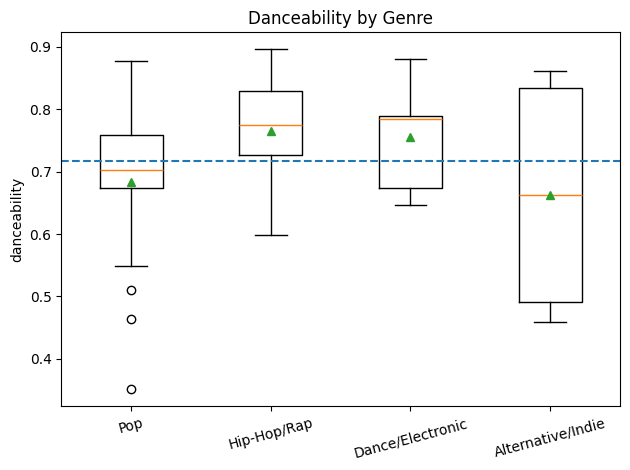

In [156]:
vals = [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].dropna().values for g in genres]
plt.figure()
plt.boxplot(vals, labels=genres, showmeans=True)
plt.axhline(overall_mean, linestyle="--")  # overall mean reference
plt.title("Danceability by Genre")
plt.ylabel(metric)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Interpretation: The genres with means above the average blue line are Hip-Hop/Rap and Dance/Electronicm which are more danceable than the dataset average. Alternative/Indie shows a wider spread, which means a greater variability in danceability within that genre.



##### 27) How does the loudness score compare between those same genres?

In [157]:
genres = ["Pop","Hip-Hop/Rap","Dance/Electronic","Alternative/Indie"]
metric = "loudness"

overall_mean = data[metric].mean()

comp = pd.DataFrame({
    "genre_group": genres,
    "n": [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].dropna().shape[0] for g in genres],
    "mean": [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].mean() for g in genres]
})
comp["diff_vs_overall"] = comp["mean"] - overall_mean
comp["vs_overall"] = comp["diff_vs_overall"].map(lambda x: "above" if x>0 else ("below" if x<0 else "equal"))
print("Overall mean:", overall_mean)
print(comp)

Overall mean: -6.225899999999999
         genre_group   n      mean  diff_vs_overall vs_overall
0                Pop  22 -6.255364        -0.029464      below
1        Hip-Hop/Rap  13 -6.917846        -0.691946      below
2   Dance/Electronic   5 -5.338000         0.887900      above
3  Alternative/Indie   4 -5.421000         0.804900      above


Interpretation: Overall loudness averages −6.226 dB (dB: more positive = louder, more negative = quieter). Dance/Electronic (n=5, −5.338 dB) and Alternative/Indie (n=4, −5.421 dB) are louder than average by ~+0.89 dB and +0.80 dB. Pop (n=22, −6.255 dB) is at the average (≈ −0.03 dB), while Hip-Hop/Rap (n=13, −6.918 dB) is quieter by about −0.69 dB in this dataset. The small sample sizes for Dance/Electronic (5) and Alternative/Indie (4) mean their averages are less stable.

C:\Users\oumai\AppData\Local\Temp\ipykernel_31224\1653966046.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, labels=genres, showmeans=True)


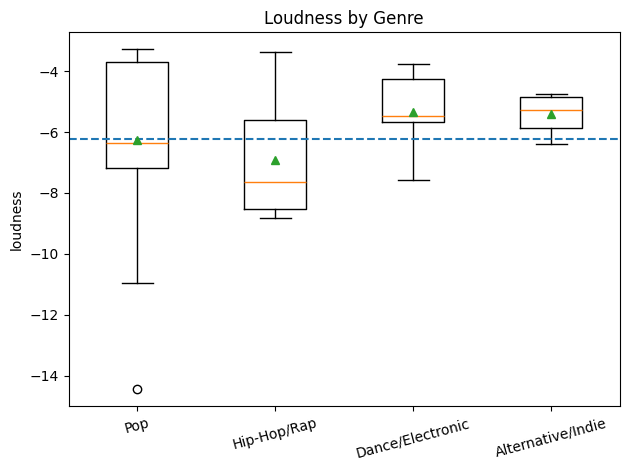

In [158]:
vals = [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].dropna().values for g in genres]
plt.figure()
plt.boxplot(vals, labels=genres, showmeans=True)
plt.axhline(overall_mean, linestyle="--")
plt.title("Loudness by Genre")
plt.ylabel(metric)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Interpretation: Loudness is measured in dB, where higher (less negative or more positive) values are louder and lower (more negative) values are quieter. Genres with means above the dashed line are louder than the dataset average, while those below are quieter. The alternative/Indie genre box which is located higher and appears smaller means the genre is consistently loud, while the pop genre wider box indicates more mixed levels and greater variability.

##### 28) How does the acousticness score compare between those same genres?

In [159]:
genres = ["Pop","Hip-Hop/Rap","Dance/Electronic","Alternative/Indie"]
metric = "acousticness"  # (not "acoustics" in the dataset)

overall_mean = data[metric].mean()

comp = pd.DataFrame({
    "genre_group": genres,
    "n": [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].dropna().shape[0] for g in genres],
    "mean": [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].mean() for g in genres]
})
comp["diff_vs_overall"] = comp["mean"] - overall_mean
comp["vs_overall"] = comp["diff_vs_overall"].map(lambda x: "above" if x>0 else ("below" if x<0 else "equal"))
print("Overall mean:", overall_mean)
print(comp)

Overall mean: 0.2562058
         genre_group   n      mean  diff_vs_overall vs_overall
0                Pop  22  0.322864         0.066658      above
1        Hip-Hop/Rap  13  0.188741        -0.067465      below
2   Dance/Electronic   5  0.099440        -0.156766      below
3  Alternative/Indie   4  0.583500         0.327294      above


Interpretation: Acousticness across genres is interpreted > higher = more “acoustic/organic”. Overall average is 0.256. Alternative/Indie is much more acoustic (n=4, mean 0.584, +0.327 vs overall), and Pop is a little bit more acoustic (n=22, mean 0.323, +0.067). Hip-Hop/Rap is slightly less acoustic (n=13, mean 0.189, −0.067), while Dance/Electronic is the least acoustic (n=5, mean 0.099, −0.157). Differences are meaningful but as indicated before, due to the small sample sizes for Alternative/Indie and Dance/Electronic, those estimates are less stable.

C:\Users\oumai\AppData\Local\Temp\ipykernel_31224\2196129957.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, labels=genres, showmeans=True)


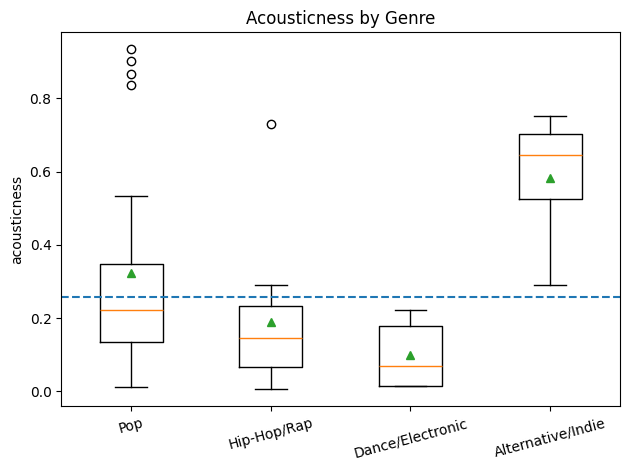

In [160]:
vals = [data.loc[data["genre"].str.contains(g, case=False, na=False), metric].dropna().values for g in genres]
plt.figure()
plt.boxplot(vals, labels=genres, showmeans=True)
plt.axhline(overall_mean, linestyle="--")
plt.title("Acousticness by Genre")
plt.ylabel(metric)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Interpretation: The boxplot shows acousticness varies strongly by genre. Alternative/Indie is the most acoustic, its average is well above the blue line of the mean. Pop is slightly above average but mixed, with several high outliers. Hip-Hop/Rap is below the mean. Dance/Electronic is the least acoustic with a small box.




##### **Suggestions for improvements/further research**

- Adding z-scores to turn raw features into comparable “how exceptional is this track/genre?” signals, and then rank or recommend.
- Add real popularity signals (streams, chart weeks, playlist adds) instead of just “in Top-50.”
- Basic distributions: histograms for danceability, energy, valence, tempo, duration_ms, loudness.
- Simple relationships: scatterplots
-- energy vs loudness
-- danceability vs valence
-- tempo vs danceability

- Correlation matrix (numeric): highlight top ± pairs and “near zero” pairs.